# **Lab 2 : Direct method of Interpolation**<br>

Interpolation is the process of estimating unknown data that lies within the range of some known data. The simplest interpolation is the **Direct method of Interpolation**. In order to interpolate unknown data, one needs to define a model that would fit the known data and based on that model, one would obtain the unknown data. This model would basically be a function that tries to satisfy the known data points. There can be various types of functions that may satisfy the same given data points, but for interpolation, we usually choose **polynomials** as interpolating functions due to the fact that polynomials are very easy to evaluate, differentiate and integrate.

In today's lab, we will be implementing the Direct method of Interpolation in python. To test our implementation, we will be using the same data that we used during our class lectures. Run the following cell to load the known data points:


In [ ]:
t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

##Task 1
Design a utility function that will be called in the `DirectInterpolation` function. The purpose of this function will be to find the $n+1$ closest points to the unknown value $t_{new}$ where we want to interpolate the data, where $n$ is the order of the interpolating polynomial. Understand that the nearest points should be selected such that they bracket the $t_{new}$. The function to be implemented is as follows:

In [100]:
def NearestPoints(t, v, n, t_new):
  #Write your implementation here
  absolute_differences = [abs(t_value - t_new) for t_value in t]
  # print(absolute_differences)

  sorted_indices = sorted(range(len(t)), key=absolute_differences.__getitem__)
  # print(sorted_indices)

  selected_indices = sorted_indices[:n+1]
  # print(selected_indices)

  # Create lists of selected t and v values
  t_nearest = [t[i] for i in selected_indices]
  v_nearest = [v[i] for i in selected_indices]

  return t_nearest, v_nearest

The above function is supposed to return two vectors, say `t_nearest` and `v_nearest` consisting of $n+1$ elements each. For testing how the function works, we can print the data and see what we are getting. If our implementation is correct, then we should be getting $[15], [362.78]$ for $n=0$. Run the following cell to check this:

In [101]:
n = 0
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15]
[362.78]


In [102]:
n = 1
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20]
[362.78, 517.35]


The output for $n=1$ should be $[15, 20], [362.78, 517.35]$

In [103]:
n = 2
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20, 10]
[362.78, 517.35, 227.04]


The output for $n=2$ should be $[15, 20, 10], [362.78, 517.35, 227.04]$

## Task 2
Now your task is to design a generalized function that takes the given data as parameters as well as the order $n$ of the polynomial and uses the *Direct Interpolation* method to interpolate the unknown data at $t_{new}$. The following cell contains the function to be implemented:

In [104]:
import numpy as np

def evaluate_polynomial(coefficients, x):
    # Evaluate a polynomial with given coefficients at x
    result = 0
    power = 1
    for coef in coefficients:
        result += coef * power
        power *= x
    return result

def DirectInterpolation(t, v, n, t_new):
    # Find the n+1 closest data points to t_new
    t_nearest, v_nearest = NearestPoints(t, v, n, t_new)

    # Create the Vandermonde matrix using t_nearest values
    A = np.vander(t_nearest, increasing=True)

    # Extract the coefficients of the interpolating polynomial using linear algebra
    coefficients = np.linalg.solve(A, v_nearest)

    # Evaluate the interpolating polynomial at t_new
    interpolated_value = evaluate_polynomial(coefficients, t_new)

    return interpolated_value

Note that the above function will at first need to find a number of closest points to the unknown data $t_{new}$, and this number will vary depending on the order $n$ of the polynomial that we want to use as the interpolating function. So you will have to call the function you implemented in Task 1 inside this function.

In [105]:
print(DirectInterpolation(t, v, 1, 16))

393.69399999999996


For $n=1$, we should get $v(16) = 393.7ms^{-1}$.

In [108]:
print(DirectInterpolation(t, v, 2, 16))

392.1876


For $n=2$, we should get $v(16) = 392.19ms^{-1}$.

In [109]:
print(DirectInterpolation(t, v, 3, 16))

392.05716799999993


In [110]:
n=[]
interpolated_values=[]
val=DirectInterpolation(t, v, 1, 16)
interpolated_values.append(val)
print(val)


393.69399999999996


In [111]:
val=DirectInterpolation(t, v, 2, 16)
interpolated_values.append(val)
n.append(2)
print(val)

392.1876


In [112]:
val=DirectInterpolation(t, v, 3, 16)
interpolated_values.append(val)
n.append(3)
print(val)

392.05716799999993


In [113]:
val=DirectInterpolation(t, v, 4, 16)
interpolated_values.append(val)
n.append(4)
print(val)

392.0737109333333


In [114]:
val=DirectInterpolation(t, v, 5, 16)
interpolated_values.append(val)
print(val)

392.0705789155555


For $n=2$, we should get $v(16) = 392.06ms^{-1}$.

##Task 3
Now, test the function using different order of polynomials, setting $n = 1, 2,$ and $3$ and so on and print the absolute relative approximate error at each step. Also generate a plot of Order $(n)$ vs Relative Approximate Error $(|\epsilon_a|\%)$. In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

[0.2, 0.16666666666666666, 0.14285714285714285, 0.125]


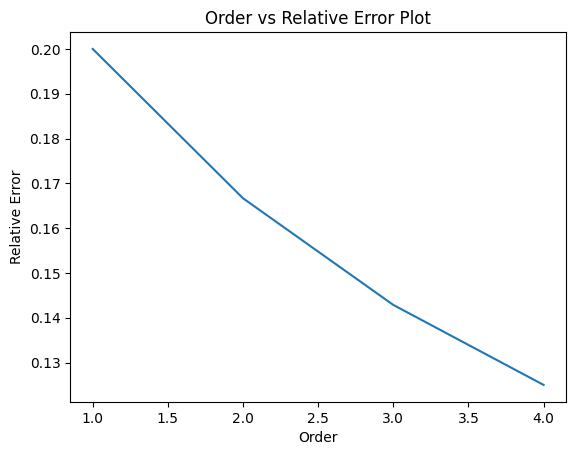

In [120]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5)
vals = np.arange(100, 200, 20)

# Calculate interpolated values using vals
interpolated_values = vals

relative_errors = [abs((interpolated_values[i] - interpolated_values[i-1]) / interpolated_values[i-1]) for i in range(1, len(interpolated_values))]

print(relative_errors)
plt.plot(iters[1:], relative_errors)  # Use iters as x-axis values
plt.title("Order vs Relative Error Plot")
plt.xlabel("Order")
plt.ylabel("Relative Error")
plt.show()


##Task 4
Now, write a function for evaluating the acceleration at $t = 16$

In [90]:
import numpy as np

def evaluate_polynomial(coefficients, x):
    result = 0
    power = 1
    for coef in coefficients:
        result += coef * power
        power *= x
    return result

def DirectInterpolation(t, v, n, t_new):
    t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
    A = np.vander(t_nearest, increasing=True)
    coefficients = np.linalg.solve(A, v_nearest)

    interpolated_value = evaluate_polynomial(coefficients, t_new)

    return interpolated_value,coefficients

def acceleration(coefficients, t_new):
    n = len(coefficients)
    second_derivative_coefficients = [coef * i * (i - 1) for i, coef in enumerate(coefficients[2:], start=2)]
    acceleration_at_t_new = evaluate_polynomial(second_derivative_coefficients, t_new)

    return acceleration_at_t_new

t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

interpolated_value,coefficients = DirectInterpolation(t, v, 3, 16)


acceleration_value = acceleration(coefficients, 16)
print("Acceleration:", acceleration_value)

Acceleration: 0.7858080000000013
